## Analysing co2 emissions data

This is my first time working on a data analysis project outside of any tutorial.
I do not have a definite goal in mind, I will just explore hoping to learn more about data as well as tools as I move forward

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
co2_data = pd.read_csv('owid-co2-data.csv')
co2_data.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# let's check for null values
null_values = co2_data.isnull().sum()
print(null_values)



country                            0
year                               0
iso_code                        8439
population                      9680
gdp                            35444
                               ...  
temperature_change_from_n2o    12855
total_ghg                      44341
total_ghg_excluding_lucf       44341
trade_co2                      46160
trade_co2_share                46160
Length: 79, dtype: int64


In [53]:
# Dropping the rows with null values
co2_data = co2_data.dropna()

co2_data.isnull().sum()

country                        0
year                           0
iso_code                       0
population                     0
gdp                            0
                              ..
temperature_change_from_n2o    0
total_ghg                      0
total_ghg_excluding_lucf       0
trade_co2                      0
trade_co2_share                0
Length: 79, dtype: int64

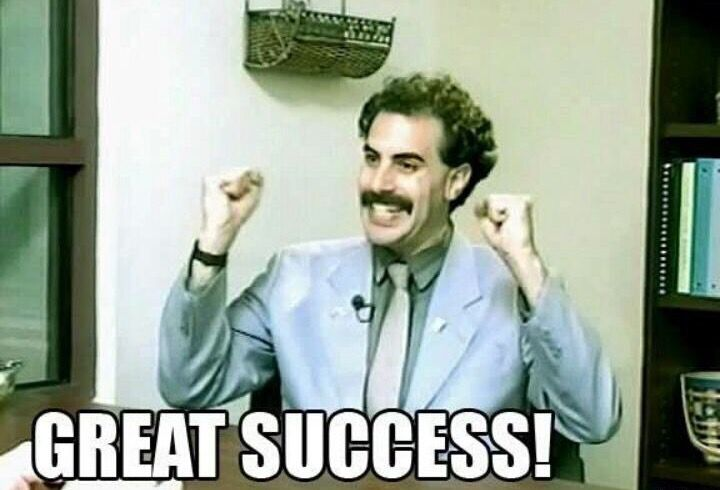

In [54]:
# See what years are present in the data
co2_data['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

Nice looks like the data is present for all the years from 1750 to 2020 but after dropping the null values we see that the data is present only 1990 onwards

In [55]:
co2_data.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
3626,Australia,1990,AUS,17126301.0,4.641366e+11,3.463,0.202,278.160,21.324,8.302,...,1.038,1.750,0.007,0.008,0.017,0.002,545.39,490.53,-34.901,-12.547
3627,Australia,1991,AUS,17353191.0,4.613021e+11,3.183,0.183,279.534,1.374,0.494,...,1.068,1.742,0.007,0.008,0.017,0.002,546.09,491.24,-35.695,-12.769
3628,Australia,1992,AUS,17549282.0,4.786338e+11,2.923,0.167,284.529,4.995,1.787,...,1.126,1.733,0.007,0.009,0.017,0.002,547.00,492.14,-38.086,-13.386
3629,Australia,1993,AUS,17722905.0,5.015248e+11,3.005,0.170,288.874,4.345,1.527,...,1.225,1.728,0.007,0.009,0.018,0.002,549.18,494.33,-41.510,-14.370
3630,Australia,1994,AUS,17897430.0,5.279932e+11,3.484,0.195,293.701,4.827,1.671,...,1.421,1.720,0.007,0.009,0.018,0.002,554.99,500.14,-37.772,-12.861


In [56]:
co2_data.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,1316.000000,1.316000e+03,1.316000e+03,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,...,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,2005.129939,6.619595e+07,1.284519e+12,16.779030,0.225070,507.782358,4.750733,-0.468516,560.554312,3.637538,...,2.333141,1.561623,0.004150,0.014485,0.019595,0.000860,595.108906,613.756869,1.790872,21.396815
std,8.920808,2.014672e+08,2.885670e+12,78.111547,0.183675,1344.986198,66.644326,6.199141,1390.651128,82.138479,...,7.198899,3.359077,0.009055,0.032964,0.042511,0.001712,1498.013972,1584.170055,171.816738,49.176868
min,1990.000000,3.679130e+05,4.761400e+09,0.000000,0.000000,1.376000,-547.517000,-43.988000,-7.220000,-588.911000,...,0.000000,0.002000,-0.001000,0.000000,0.000000,0.000000,-186.660000,1.870000,-1532.080000,-60.512000
25%,1997.000000,5.139294e+06,1.108511e+11,0.750500,0.123750,40.938250,-3.177000,-3.588500,41.720750,-5.324250,...,0.191000,0.137750,0.000000,0.001000,0.002000,0.000000,41.947500,52.945000,-1.090750,-1.460000
50%,2005.000000,1.037722e+07,2.912601e+11,2.038000,0.181000,87.344500,-0.006500,-0.015000,85.145500,-0.075000,...,0.480500,0.397000,0.001000,0.003000,0.005000,0.000000,99.835000,105.145000,6.508000,12.860000
75%,2013.000000,4.956739e+07,1.299581e+12,7.696750,0.259000,374.331500,3.351250,3.036500,387.416500,3.929000,...,1.630500,1.484000,0.003000,0.011000,0.018000,0.001000,457.937500,492.210000,33.086500,30.308750
max,2020.000000,1.426106e+09,2.415184e+13,849.976000,1.413000,10905.693000,911.756000,31.654000,10653.655000,970.004000,...,58.136000,20.815000,0.060000,0.232000,0.278000,0.010000,12295.620000,12942.870000,654.142000,568.635000


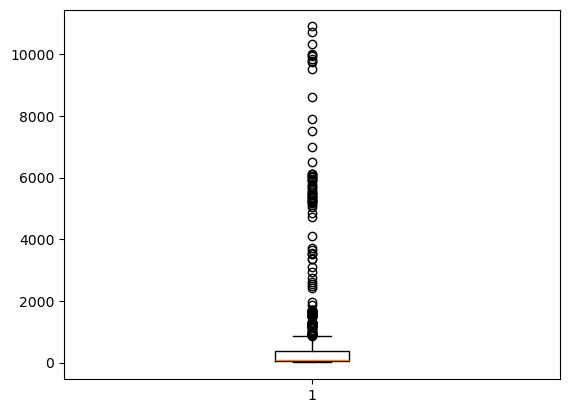

In [57]:
# Let's plot a box plot for the co2 emissions
plt.boxplot(co2_data['co2'])
plt.show()


We see that most outliers are way above the upper whisker. This means most co2 emissions are present in the lower range of the data.

Check the correlation between the co2 emissions and the other columns

In [58]:
# Get correlation matrix where abs(corr) > 0.5
corr_matrix = co2_data.select_dtypes(include=['float64', 'int64']).corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.5]

# Drop perfect correlations (1.0)
high_corr = high_corr[high_corr < 1.0]

# Show non-null values
high_corr.dropna(how='all').dropna(axis=1, how='all')


,year,population,gdp,cement_co2,co2,co2_growth_abs,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_per_capita,co2_including_luc_per_gdp,...,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,0.707162,0.879625,0.826822,0.591068,0.849745,NaN,NaN,NaN,...,0.503661,0.983915,0.579822,0.835224,NaN,0.590801,0.671147,0.846880,0.845148,-0.652023
gdp,NaN,0.707162,NaN,0.674402,0.945775,NaN,0.932652,NaN,NaN,NaN,...,0.887846,0.724573,0.871237,0.869482,0.890880,0.911769,0.912583,0.936949,0.937255,NaN
cement_co2,NaN,0.879625,0.674402,NaN,0.808532,0.599838,0.793798,NaN,NaN,NaN,...,NaN,0.911490,NaN,0.701927,NaN,NaN,0.539961,0.819246,0.820097,-0.732181
co2,NaN,0.826822,0.945775,0.808532,NaN,NaN,0.982755,NaN,NaN,NaN,...,0.839343,0.863116,0.851003,0.921991,0.820312,0.867241,0.882356,0.989090,0.997573,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
temperature_change_from_ghg,NaN,0.590801,0.911769,NaN,0.867241,NaN,0.882626,NaN,NaN,NaN,...,0.931648,0.598183,0.987154,0.905302,0.992337,NaN,0.958563,0.868520,0.867828,NaN
temperature_change_from_n2o,NaN,0.671147,0.912583,0.539961,0.882356,NaN,0.896411,NaN,NaN,NaN,...,0.878757,0.677375,0.940285,0.922731,0.933336,0.958563,NaN,0.887318,0.887864,NaN
total_ghg,NaN,0.846880,0.936949,0.819246,0.989090,NaN,0.995950,NaN,NaN,NaN,...,0.819705,0.870085,0.852292,0.948942,0.814366,0.868520,0.887318,NaN,0.993662,NaN
total_ghg_excluding_lucf,NaN,0.845148,0.937255,0.820097,0.997573,NaN,0.988635,NaN,NaN,NaN,...,0.822351,0.877407,0.851332,0.940580,0.815701,0.867828,0.887864,0.993662,NaN,-0.501272


We see that there is a strong correlation between the co2 emissions and the gdp. Let's see it on a graph

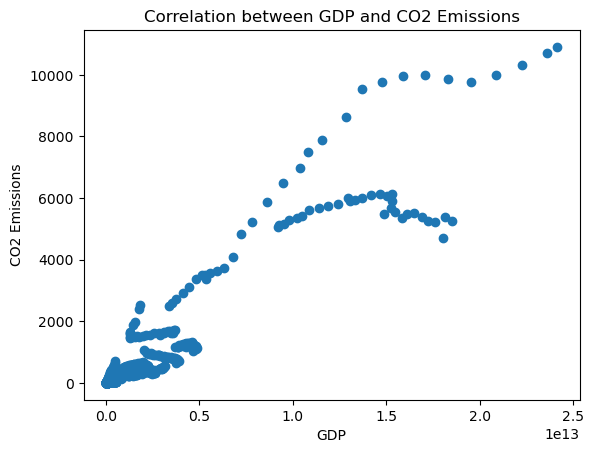

In [59]:
plt.scatter(co2_data['gdp'], co2_data['co2'])
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.title('Correlation between GDP and CO2 Emissions')
plt.show()



We see that for maximum countries the co2 emissions stayed below 6000 over the years even if GDP was highbut for some it went beyond 6000 and upto 10000. But for countries where GDP is greater than 2.0 co2 is always above 9000.

Let's focus on GDP value between 1.0 and 2.0. Here there are two clear groups. One where co2 is below 6000 and one where it is above 9000. What could be the differentiating factor?


In [60]:
co2_below_6000 = co2_data[(co2_data['co2'] < 6000) & (co2_data['gdp'] > 1.0) & (co2_data['gdp'] < 2.0)]
co2_above_9000 = co2_data[(co2_data['co2'] > 9000) & (co2_data['gdp'] > 1.0) & (co2_data['gdp'] < 2.0)]



In [61]:
co2_below_6000.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share


This was empty. A quick look made me realise that the GDP data is using scientific notation. Let's convert it to float. I was assuming it is in trillions. Like 1.3 == 1.3 trillion

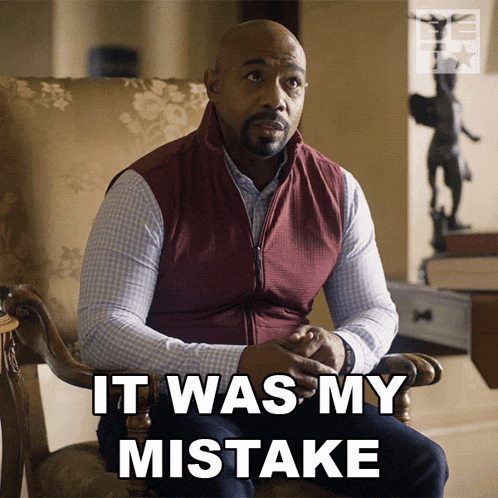

In [62]:
co2_data['gdp'] = co2_data['gdp'] / 1e9

co2_data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
3626,Australia,1990,AUS,17126301.0,464.136602,3.463,0.202,278.160,21.324,8.302,...,1.038,1.750,0.007,0.008,0.017,0.002,545.39,490.53,-34.901,-12.547
3627,Australia,1991,AUS,17353191.0,461.302104,3.183,0.183,279.534,1.374,0.494,...,1.068,1.742,0.007,0.008,0.017,0.002,546.09,491.24,-35.695,-12.769
3628,Australia,1992,AUS,17549282.0,478.633755,2.923,0.167,284.529,4.995,1.787,...,1.126,1.733,0.007,0.009,0.017,0.002,547.00,492.14,-38.086,-13.386
3629,Australia,1993,AUS,17722905.0,501.524759,3.005,0.170,288.874,4.345,1.527,...,1.225,1.728,0.007,0.009,0.018,0.002,549.18,494.33,-41.510,-14.370
3630,Australia,1994,AUS,17897430.0,527.993242,3.484,0.195,293.701,4.827,1.671,...,1.421,1.720,0.007,0.009,0.018,0.002,554.99,500.14,-37.772,-12.861


Now I got these values in billions. Let's check the data again

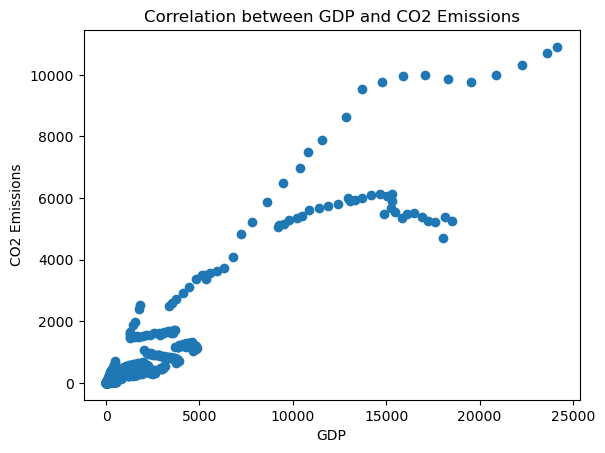

In [63]:
plt.scatter(co2_data['gdp'], co2_data['co2'])
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.title('Correlation between GDP and CO2 Emissions')
plt.show()

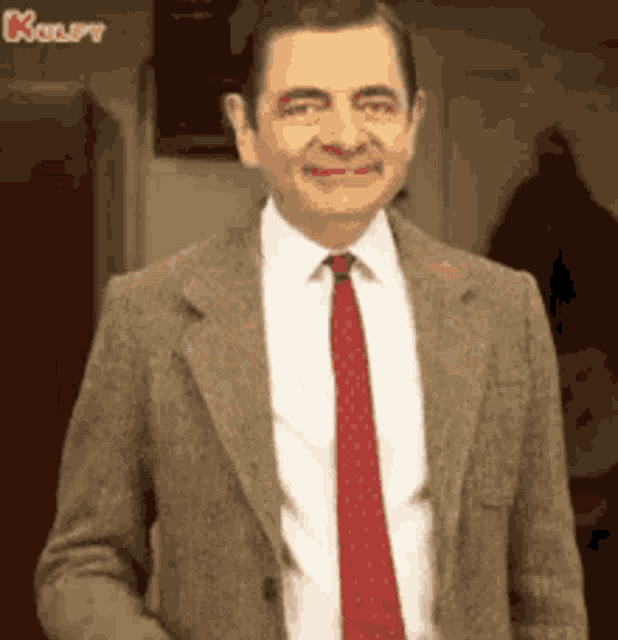

In [64]:
co2_below_6000 = co2_data[(co2_data['co2'] < 6000) & (co2_data['gdp'] > 10000) & (co2_data['gdp'] < 20000)]
co2_above_9000 = co2_data[(co2_data['co2'] > 9000) & (co2_data['gdp'] > 10000) & (co2_data['gdp'] < 20000)]


In [65]:
countries_with_high_gdp_below_6000 = co2_below_6000['country'].unique()
countries_with_high_gdp_above_9000 = co2_above_9000['country'].unique()

print(countries_with_high_gdp_below_6000)
print(countries_with_high_gdp_above_9000)


['United States']
['China']


Ahhh. So for United states the co2 emission stayed below 6000 but for China it went above 9000. I should have guessed it because these are the only wto countries with gdp above 10 trillion. Let's plot a graph for co2 in china and america over the years

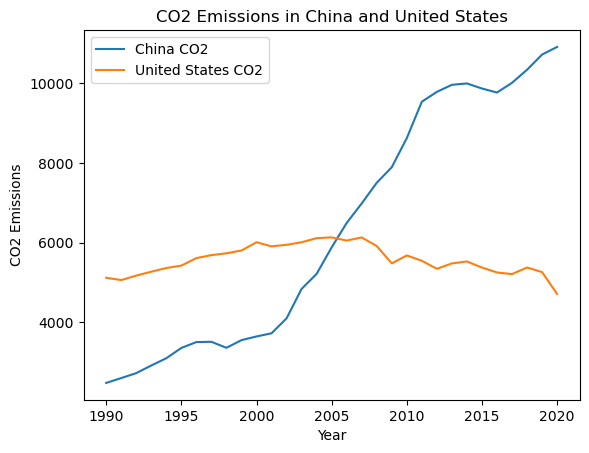

In [66]:
co2_china = co2_data[co2_data['country'] == 'China']
co2_usa = co2_data[co2_data['country'] == 'United States']

plt.plot(co2_china['year'], co2_china['co2'], label='China CO2')
plt.plot(co2_usa['year'], co2_usa['co2'], label='United States CO2')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions in China and United States')
plt.legend()
plt.show()

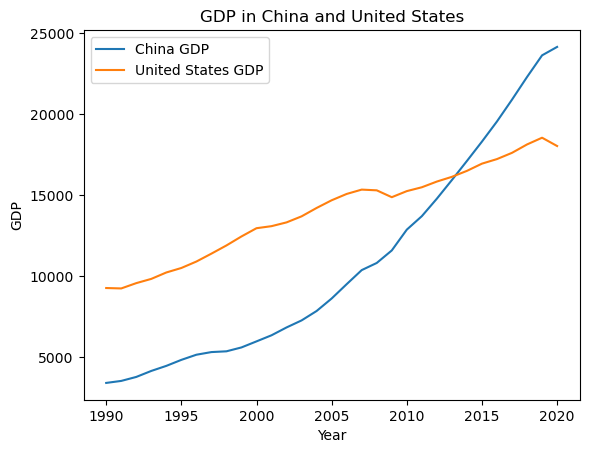

In [67]:
plt.plot(co2_china['year'], co2_china['gdp'], label='China GDP')
plt.plot(co2_usa['year'], co2_usa['gdp'], label='United States GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP in China and United States')
plt.legend()
plt.show()

Not sure why data shows that China's GDP is higher than USA's GDP after 2012. That's not true

Let's focus on countries with GDP below 5 trillion

In [68]:
co2_data = co2_data[co2_data['gdp'] < 5000]
co2_data.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
3626,Australia,1990,AUS,17126301.0,464.136602,3.463,0.202,278.160,21.324,8.302,...,1.038,1.750,0.007,0.008,0.017,0.002,545.39,490.53,-34.901,-12.547
3627,Australia,1991,AUS,17353191.0,461.302104,3.183,0.183,279.534,1.374,0.494,...,1.068,1.742,0.007,0.008,0.017,0.002,546.09,491.24,-35.695,-12.769
3628,Australia,1992,AUS,17549282.0,478.633755,2.923,0.167,284.529,4.995,1.787,...,1.126,1.733,0.007,0.009,0.017,0.002,547.00,492.14,-38.086,-13.386
3629,Australia,1993,AUS,17722905.0,501.524759,3.005,0.170,288.874,4.345,1.527,...,1.225,1.728,0.007,0.009,0.018,0.002,549.18,494.33,-41.510,-14.370
3630,Australia,1994,AUS,17897430.0,527.993242,3.484,0.195,293.701,4.827,1.671,...,1.421,1.720,0.007,0.009,0.018,0.002,554.99,500.14,-37.772,-12.861


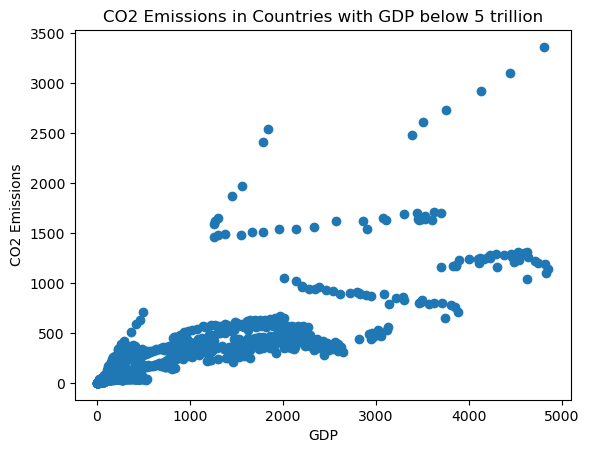

In [69]:
plt.scatter(co2_data['gdp'], co2_data['co2'])
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions in Countries with GDP below 5 trillion')
plt.show()

These are too many data points. Let's reduce the number of years in focus. We will focus after 2000

In [70]:
co2_data = co2_data[co2_data['year'] >= 2000]
co2_data.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
3636,Australia,2000,AUS,19132473.0,692.059308,3.621,0.189,350.008,6.048,1.758,...,1.561,1.692,0.007,0.010,0.019,0.002,660.97,606.86,-59.134,-16.895
3637,Australia,2001,AUS,19365437.0,713.890071,3.541,0.183,357.784,7.776,2.222,...,1.635,1.697,0.007,0.010,0.020,0.002,667.51,635.53,-58.196,-16.266
3638,Australia,2002,AUS,19595357.0,747.065704,3.488,0.178,362.537,4.753,1.328,...,1.781,1.698,0.007,0.010,0.020,0.002,664.29,630.23,-44.294,-12.218
3639,Australia,2003,AUS,19819450.0,774.451036,3.584,0.181,369.630,7.093,1.957,...,1.775,1.692,0.007,0.011,0.020,0.002,587.87,550.56,-34.903,-9.443
3640,Australia,2004,AUS,20046680.0,809.792438,3.555,0.177,383.159,13.529,3.660,...,1.703,1.691,0.007,0.011,0.021,0.002,639.40,608.93,-38.460,-10.038


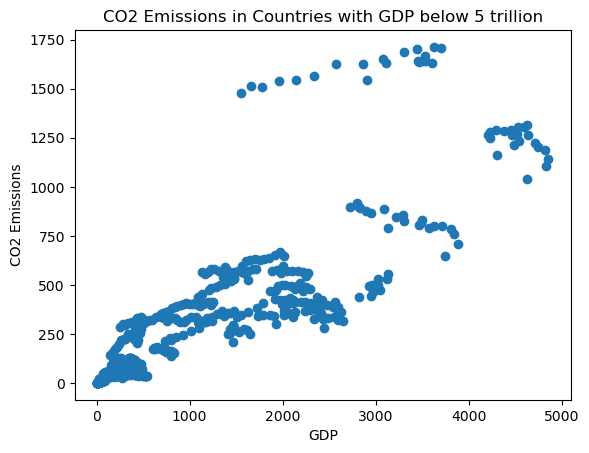

In [71]:
plt.scatter(co2_data['gdp'], co2_data['co2'])
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions in Countries with GDP below 5 trillion')
plt.show()

We roughly see four distinct groups. Let's focus on the top group with highest co2 emissions

In [72]:
co2_data_below_1400 = co2_data[co2_data['co2'] > 1400]
co2_data_below_1400['country'].unique()


array(['Russia'], dtype=object)

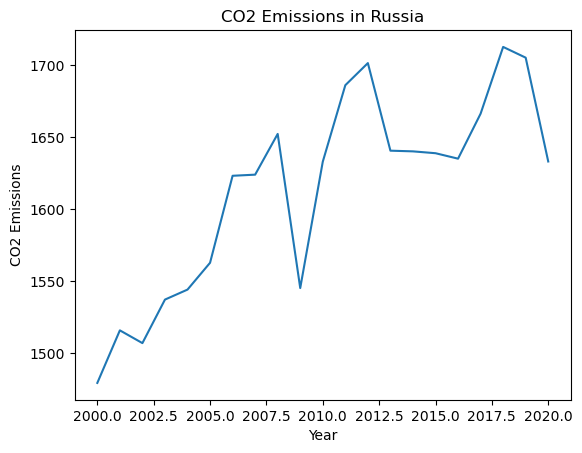

In [73]:
co2_russia = co2_data[co2_data['country'] == 'Russia']
plt.plot(co2_russia['year'], co2_russia['co2'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions in Russia')
plt.show()

Let's focus on the group with GDP between 4 trillion and 5 trillion

In [74]:
co2_data_4_to_5 = co2_data[(co2_data['gdp'] >= 4000) & (co2_data['gdp'] <= 5000)]
co2_data_4_to_5['country'].unique()


array(['Japan'], dtype=object)

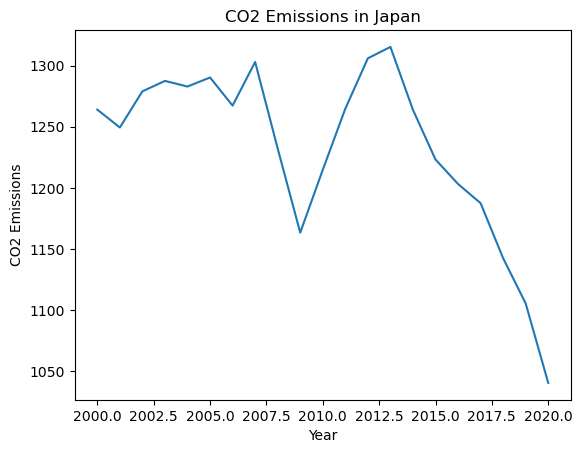

In [75]:
co2_japan = co2_data_4_to_5[co2_data_4_to_5['country'] == 'Japan']
plt.plot(co2_japan['year'], co2_japan['co2'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions in Japan')
plt.show()

Japan reduced its co2 emissions after 2012.

Now focus on countries with GDP between 3 trillion and 4 trillion

In [76]:
co2_data_3_to_4 = co2_data[(co2_data['gdp'] >= 3000) & (co2_data['gdp'] <= 4000)]
co2_data_3_to_4['country'].unique()

array(['Brazil', 'Germany', 'Russia'], dtype=object)

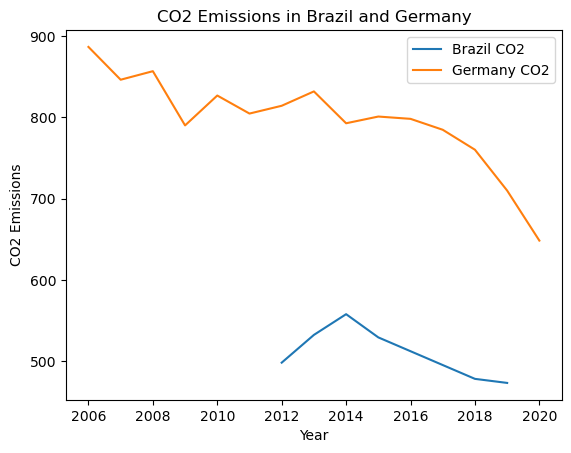

In [78]:
# CO2 emission over the years in Brazil and Germany
co2_brazil = co2_data_3_to_4[co2_data_3_to_4['country'] == 'Brazil']
co2_germany = co2_data_3_to_4[co2_data_3_to_4['country'] == 'Germany']

plt.plot(co2_brazil['year'], co2_brazil['co2'], label='Brazil CO2')
plt.plot(co2_germany['year'], co2_germany['co2'], label='Germany CO2')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions in Brazil and Germany')
plt.legend()
plt.show()

Germany and Brazil also tried reducing its co2 emissions after 2014.


countries between 1 trillion and 2 trillion

In [82]:
co2_data_1_to_2 = co2_data[(co2_data['gdp'] >= 1000) & (co2_data['gdp'] <= 2000)]
co2_data_1_to_2['country'].unique()



array(['Australia', 'Brazil', 'Canada', 'Italy', 'Poland', 'Russia',
       'South Korea', 'Spain', 'Turkey', 'United Kingdom'], dtype=object)

In [83]:
# remove countries which also have values greater than 2 trillion
co2_data_1_to_2 = co2_data_1_to_2[~co2_data_1_to_2['country'].isin(co2_data[co2_data['gdp'] > 2000]['country'])]
co2_data_1_to_2['country'].unique()


array(['Australia', 'Canada', 'Poland', 'Spain'], dtype=object)

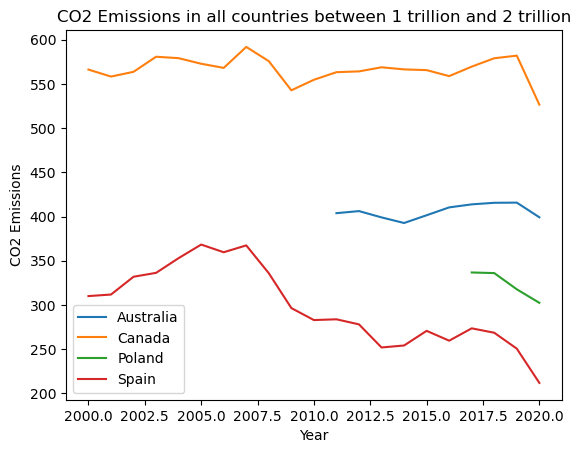

In [84]:
for country in co2_data_1_to_2['country'].unique():
    co2_country = co2_data_1_to_2[co2_data_1_to_2['country'] == country]
    plt.plot(co2_country['year'], co2_country['co2'], label=country)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions in all countries between 1 trillion and 2 trillion')
plt.legend()
plt.show()

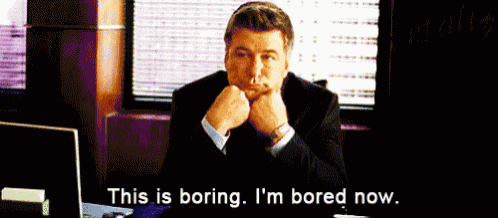

This is getting boring. Let's see if we can get more information from the data.

In [89]:
co2_data = pd.read_csv('owid-co2-data.csv').dropna()
corr_matrix = co2_data.select_dtypes(include=['float64', 'int64']).corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.5]

# Drop perfect correlations (1.0)
high_corr = high_corr[high_corr < 1.0]

# Show non-null values
high_corr.dropna(how='all').dropna(axis=1, how='all')



,year,population,gdp,cement_co2,co2,co2_growth_abs,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_per_capita,co2_including_luc_per_gdp,...,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,0.707162,0.879625,0.826822,0.591068,0.849745,NaN,NaN,NaN,...,0.503661,0.983915,0.579822,0.835224,NaN,0.590801,0.671147,0.846880,0.845148,-0.652023
gdp,NaN,0.707162,NaN,0.674402,0.945775,NaN,0.932652,NaN,NaN,NaN,...,0.887846,0.724573,0.871237,0.869482,0.890880,0.911769,0.912583,0.936949,0.937255,NaN
cement_co2,NaN,0.879625,0.674402,NaN,0.808532,0.599838,0.793798,NaN,NaN,NaN,...,NaN,0.911490,NaN,0.701927,NaN,NaN,0.539961,0.819246,0.820097,-0.732181
co2,NaN,0.826822,0.945775,0.808532,NaN,NaN,0.982755,NaN,NaN,NaN,...,0.839343,0.863116,0.851003,0.921991,0.820312,0.867241,0.882356,0.989090,0.997573,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
temperature_change_from_ghg,NaN,0.590801,0.911769,NaN,0.867241,NaN,0.882626,NaN,NaN,NaN,...,0.931648,0.598183,0.987154,0.905302,0.992337,NaN,0.958563,0.868520,0.867828,NaN
temperature_change_from_n2o,NaN,0.671147,0.912583,0.539961,0.882356,NaN,0.896411,NaN,NaN,NaN,...,0.878757,0.677375,0.940285,0.922731,0.933336,0.958563,NaN,0.887318,0.887864,NaN
total_ghg,NaN,0.846880,0.936949,0.819246,0.989090,NaN,0.995950,NaN,NaN,NaN,...,0.819705,0.870085,0.852292,0.948942,0.814366,0.868520,0.887318,NaN,0.993662,NaN
total_ghg_excluding_lucf,NaN,0.845148,0.937255,0.820097,0.997573,NaN,0.988635,NaN,NaN,NaN,...,0.822351,0.877407,0.851332,0.940580,0.815701,0.867828,0.887864,0.993662,NaN,-0.501272


In [91]:
co2_data_sorted_by_trade_co2 = co2_data.sort_values(by='trade_co2', ascending=False)
co2_data_sorted_by_trade_co2['country'].unique()

array(['United States', 'Japan', 'Germany', 'United Kingdom', 'Italy',
       'France', 'Switzerland', 'Belgium', 'South Korea', 'Turkey',
       'Netherlands', 'Spain', 'Portugal', 'Brazil', 'Canada', 'Finland',
       'Sweden', 'Austria', 'Hungary', 'Lithuania', 'Ireland', 'Greece',
       'Denmark', 'Slovakia', 'Kazakhstan', 'Belarus', 'Croatia',
       'Norway', 'Latvia', 'Romania', 'Malta', 'Czechia', 'Slovenia',
       'Estonia', 'New Zealand', 'Luxembourg', 'Cyprus', 'Bulgaria',
       'Poland', 'Australia', 'Ukraine', 'China', 'Russia'], dtype=object)

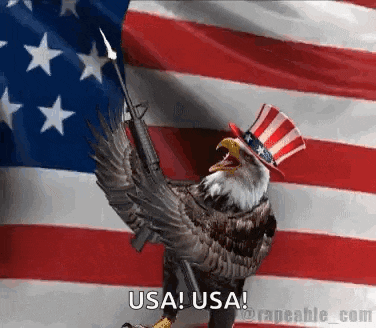

In [92]:
co2_data_sorted_by_oil_co2 = co2_data.sort_values(by='oil_co2', ascending=False)
co2_data_sorted_by_oil_co2['country'].unique()


array(['United States', 'China', 'Russia', 'Japan', 'Germany', 'Brazil',
       'Canada', 'Italy', 'France', 'South Korea', 'United Kingdom',
       'Ukraine', 'Spain', 'Australia', 'Turkey', 'Poland', 'Belarus',
       'Belgium', 'Netherlands', 'Kazakhstan', 'Greece', 'Sweden',
       'Romania', 'Portugal', 'Austria', 'Switzerland', 'Denmark',
       'Finland', 'Bulgaria', 'Ireland', 'Norway', 'Czechia', 'Hungary',
       'Lithuania', 'New Zealand', 'Croatia', 'Slovakia', 'Latvia',
       'Estonia', 'Slovenia', 'Luxembourg', 'Cyprus', 'Malta'],
      dtype=object)

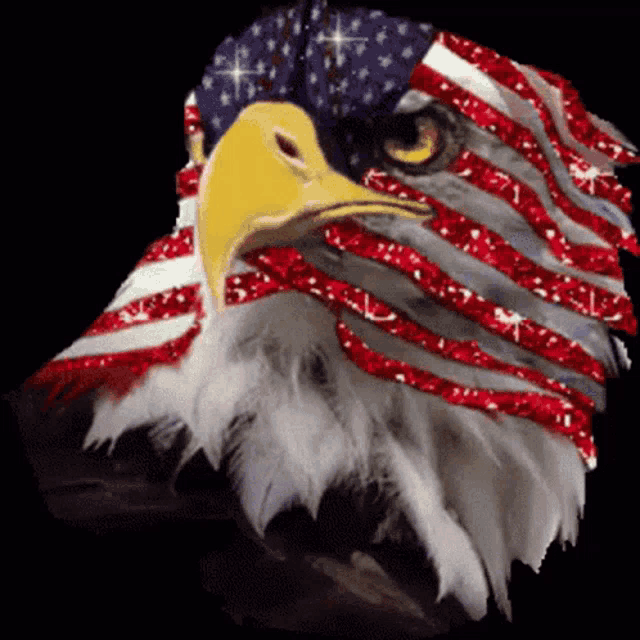

In [94]:
co2_data_sorted_by_cement_co2 = co2_data.sort_values(by='cement_co2', ascending=False)
co2_data_sorted_by_cement_co2['country'].unique()

array(['China', 'United States', 'Japan', 'Turkey', 'Russia',
       'South Korea', 'Brazil', 'Italy', 'Spain', 'Germany', 'France',
       'Ukraine', 'Canada', 'Poland', 'United Kingdom', 'Greece',
       'Kazakhstan', 'Romania', 'Portugal', 'Australia', 'Belgium',
       'Belarus', 'Switzerland', 'Czechia', 'Ireland', 'Bulgaria',
       'Austria', 'Slovakia', 'Hungary', 'Lithuania', 'Croatia', 'Sweden',
       'Denmark', 'Cyprus', 'Norway', 'Finland', 'New Zealand', 'Estonia',
       'Slovenia', 'Latvia', 'Luxembourg', 'Netherlands', 'Malta'],
      dtype=object)

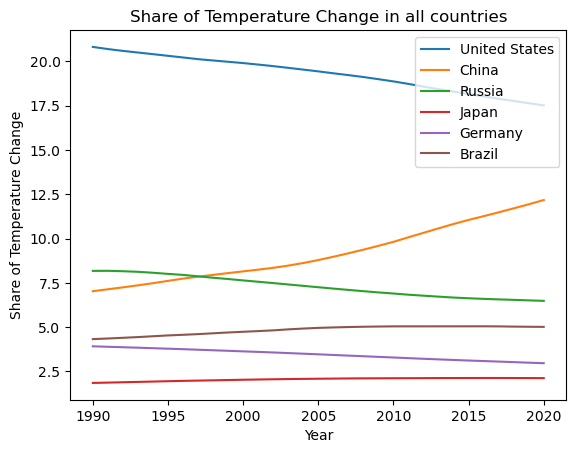

In [100]:
# A grid graph of share of temprature change of all countries over the years
countries = ['United States', 'China', 'Russia', 'Japan', 'Germany', 'Brazil']
for country in countries:
    co2_country = co2_data[co2_data['country'] == country]
    plt.plot(co2_country['year'], co2_country['share_of_temperature_change_from_ghg'], label=country)
plt.xlabel('Year')
plt.ylabel('Share of Temperature Change')
plt.title('Share of Temperature Change in all countries')
plt.legend()
plt.show()

In [102]:
# countries with negative co2_growth_prct from 2010 to 2020
co2_data_negative_growth = co2_data[(co2_data['co2_growth_prct'] < 0) & (co2_data['year'] >= 2010) & (co2_data['year'] <= 2020)]
co2_data_negative_growth['country'].unique()


array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'China', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Slovakia', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'United States'], dtype=object)

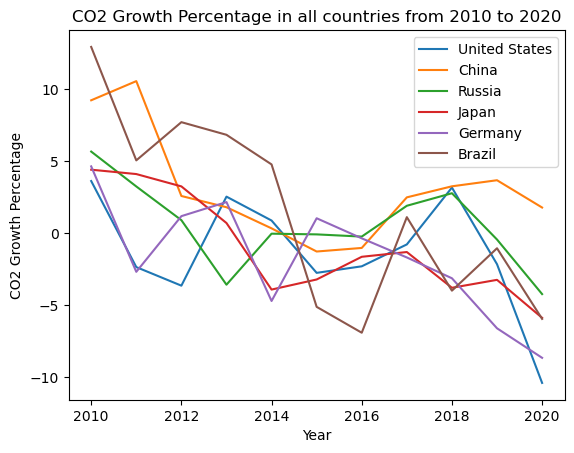

In [104]:
#plot co2 growth prct of United States, China, Russia, Japan, Germany, Brazil from 2010 to 2020
countries = ['United States', 'China', 'Russia', 'Japan', 'Germany', 'Brazil']
co2_data_2010_to_2020 = co2_data[(co2_data['year'] >= 2010) & (co2_data['year'] <= 2020)]
for country in countries:
    co2_country = co2_data_2010_to_2020[co2_data_2010_to_2020['country'] == country]
    plt.plot(co2_country['year'], co2_country['co2_growth_prct'], label=country)
plt.xlabel('Year')
plt.ylabel('CO2 Growth Percentage')
plt.title('CO2 Growth Percentage in all countries from 2010 to 2020')
plt.legend()
plt.show()

Okay this is where I end this exploration is. Happy news is that almost all the polluters are working on reducing their co2 emissions. And USA achived a -10% CO2 growth in 2020. That's impressive